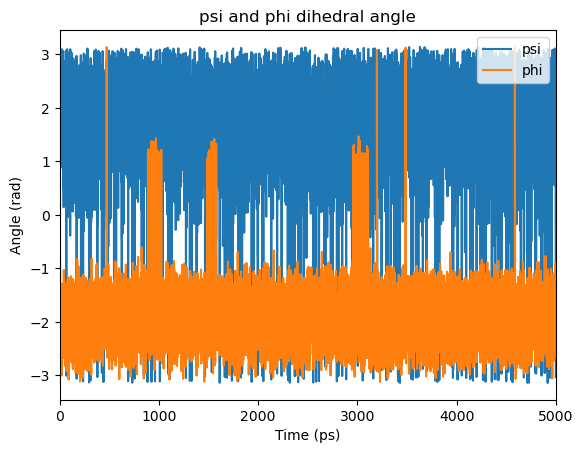

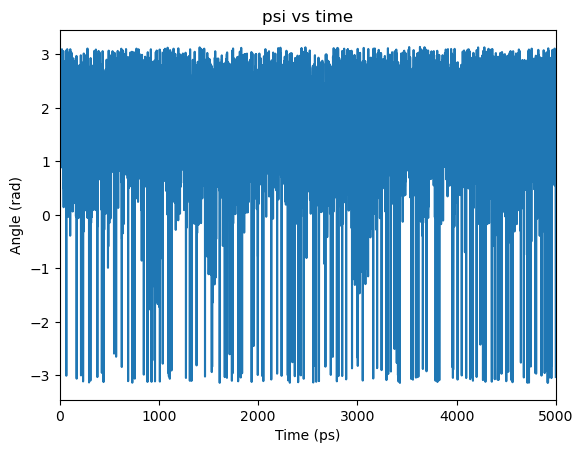

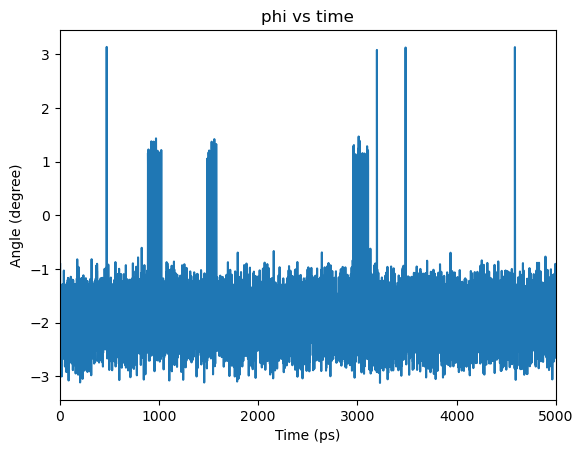

In [1]:
# this notebook is for plotting the end to end analysis and radius of gyration
import numpy as np
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt

#load mdtraj
import mdtraj as md
import os

traj = md.load('adp_exchange4temps.trr', top='adp_exchange4temps.gro')

# compute psi
psi=md.compute_psi(traj,periodic=True,opt=True)
y_psi=psi[1].flatten()
#print(y_psi)

#compute_phi
phi=md.compute_phi(traj,periodic=True,opt=True)
y_phi=phi[1][:,0]
#print(y_phi)

#contruct time
time= np.array(list(range(0,5001)))

#plot
plt.plot(time,y_psi,label="psi")
plt.plot(time,y_phi,label="phi")
plt.legend(loc="upper right")
plt.legend(loc="upper right")
plt.xlabel('Time (ps)')
plt.ylabel('Angle (rad)')
plt.title('psi and phi dihedral angle')
plt.xlim([0,5000])
plt.savefig('psi vs phi.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

plt.plot(time,y_psi)
plt.xlabel('Time (ps)')
plt.ylabel('Angle (rad)')
plt.title('psi vs time')
plt.xlim([0,5000])
plt.savefig('psi vs time.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

plt.plot(time,y_phi)
plt.xlabel('Time (ps)')
plt.ylabel('Angle (degree)')
plt.title('phi vs time')
plt.xlim([0,5000])
plt.savefig('phi vs time.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

/state/partition1/job-26012639/ipykernel_3918745/1622232870.py:4: RuntimeWarning: divide by zero encountered in log
  H=-np.log(H)


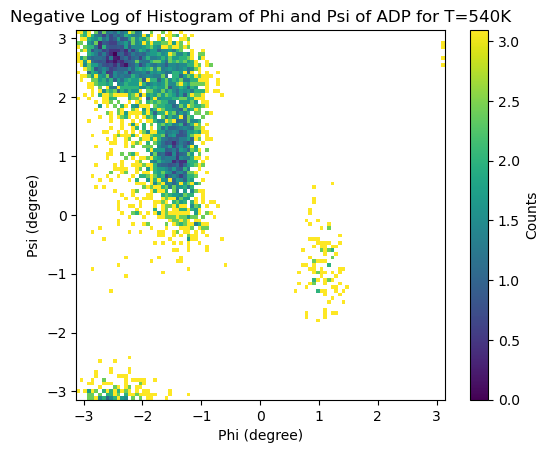

In [3]:
# np.histogram2d(y_phi, y_psi, bins=100, range=None, normed=True, weights=None, density=None)
H, xedges, yedges = np.histogram2d(y_phi, y_psi, bins=100, normed=True)
H=H.T
H=-np.log(H)
H=H-H.min()
# fig = plt.figure()
# ax = fig.add_subplot(131, title='Negative Log of Histogram of Phi and Psi of ADP for T=300K')
plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi (degree)')
plt.ylabel('Psi (degree)')
plt.title('Negative Log of Histogram of Phi and Psi of ADP for T=540K')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.savefig('Negative Log of Histogram of Phi and Psi of ADP for T=540K.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
